In [17]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [18]:
width=256
height=256
model_name="midas.tflite"
#model_name="model_quant.tflite"
image_name="11_image.png"

# input

In [19]:
img = cv2.imread(image_name)

In [20]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0

In [21]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
img = (img - mean) / std

In [22]:
img_resized = tf.image.resize(img, [width,height], method='bicubic', preserve_aspect_ratio=False)

In [23]:
#img_resized = tf.transpose(img_resized, [2, 0, 1])
img_input = img_resized.numpy()
reshape_img = img_input.reshape(1,width,height,3)
tensor = tf.convert_to_tensor(reshape_img, dtype=tf.float32)

# load model

In [24]:
print("Load model...")
interpreter = tf.lite.Interpreter(model_path=model_name)
print("Allocate tensor...")
interpreter.allocate_tensors()
print("Get input/output details...")
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Get input shape...")
input_shape = input_details[0]['shape']
print(input_shape)
print(input_details)
print(output_details)
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)

Load model...
Allocate tensor...
Get input/output details...
Get input shape...
[  1 256 256   3]
[{'name': 'Const', 'index': 0, 'shape': array([  1, 256, 256,   3], dtype=int32), 'shape_signature': array([  1, 256, 256,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'midas_net_custom/sequential/re_lu_9/Relu', 'index': 335, 'shape': array([  1, 256, 256,   1], dtype=int32), 'shape_signature': array([  1, 256, 256,   1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [25]:
print("Set input tensor...")
interpreter.set_tensor(input_details[0]['index'], tensor)

Set input tensor...


In [26]:
%%time
print("invoke()...")
interpreter.invoke()

invoke()...
CPU times: user 180 ms, sys: 7.49 ms, total: 188 ms
Wall time: 186 ms


In [27]:
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
print("get output tensor...")
output = interpreter.get_tensor(output_details[0]['index'])
#output = np.squeeze(output)
output = output.reshape(width, height)
#print(output)
prediction = np.array(output)
print("reshape prediction...")
prediction = prediction.reshape(width, height)

get output tensor...
reshape prediction...


# output file

In [28]:
#prediction = cv2.resize(prediction, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
print(" Write image to: output.png")
depth_min = prediction.min()
depth_max = prediction.max()
img_out = (255 * (prediction - depth_min) / (depth_max - depth_min)).astype("uint8")
print("save output image...")
cv2.imwrite("output.png", img_out)
print("finished")

 Write image to: output.png
save output image...
finished


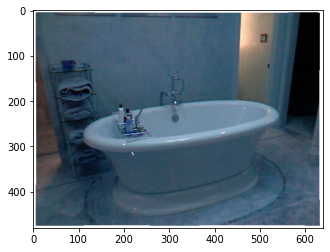

In [29]:
plt.imshow(cv2.imread(image_name))

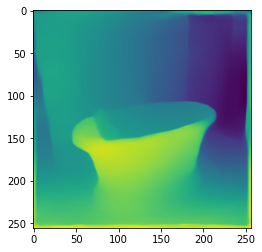

In [30]:
plt.imshow(img_out)